## Question 1

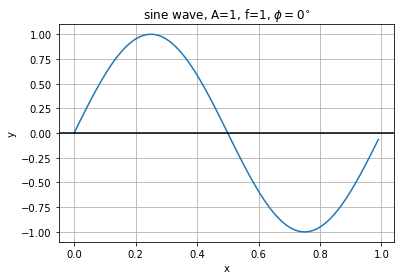

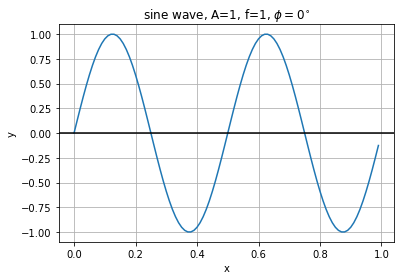

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot

def plot_wave(A,f,phi,name='',color='g'):
    plot.clf()
    x = np.arange(0, 1, 0.01);
    y  = A*np.sin(2*np.pi*f*x + np.pi/180*phi)
    plot.plot(x,y)
    plot.xlabel('x')
    plot.ylabel('y')
    plot.title(name)
    plot.grid(True, which='both') 
    plot.axhline(y=0, color='k') 
    plot.show()
    
plot_wave(1,1,0,'sine wave, A=1, f=1, $\phi=0^{\circ}$')
plot_wave(1,2,0,'sine wave, A=1, f=1, $\phi=0^{\circ}$')

In [3]:
def plot_wave_sum(A1, f1, phi1, A2, f2, phi2, name="Sum of waves"):
    plot.clf()
    x = np.arange(0, 1, 0.01);
    y1 = A1*np.sin(2*np.pi*f1*x + np.pi/180*phi1)
    y2 = A2*np.sin(2*np.pi*f2*x + np.pi/180*phi2)
    y = y1+y2
    plot.plot(x,y)
    plot.xlabel('x')
    plot.ylabel('y')
    plot.title(name)
    plot.grid(True, which='both') 
    plot.axhline(y=0, color='k') 
    plot.show()

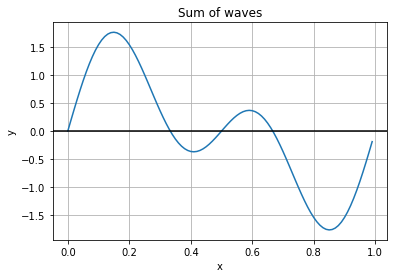

In [4]:
plot_wave_sum(1,1,0,1,2,0)

## Question 2

In [12]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cu1(math.pi/2., qr[1], qr[0])
circuit.cu1(math.pi/4., qr[2], qr[0])
circuit.cu1(math.pi/8., qr[3], qr[0])
circuit.h(qr[1])
circuit.cu1(math.pi/2., qr[2], qr[1])
circuit.cu1(math.pi/4., qr[3], qr[1])
circuit.h(qr[2])
circuit.cu1(math.pi/2., qr[3], qr[2])
circuit.h(qr[3])
circuit.measure(qr[0], cr[3])
circuit.measure(qr[1], cr[2])
circuit.measure(qr[2], cr[1])
circuit.measure(qr[3], cr[0])
circuit.draw()

## Question 3

In [13]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cu1(math.pi/2., qr[1], qr[0])
circuit.cu1(math.pi/4., qr[2], qr[0])
circuit.cu1(math.pi/8., qr[3], qr[0])
circuit.cu1(math.pi/16., qr[4], qr[0])
circuit.h(qr[1])
circuit.cu1(math.pi/2., qr[2], qr[1])
circuit.cu1(math.pi/4., qr[3], qr[1])
circuit.cu1(math.pi/8., qr[4], qr[1])
circuit.h(qr[2])
circuit.cu1(math.pi/2., qr[3], qr[2])
circuit.cu1(math.pi/4., qr[4], qr[2])
circuit.h(qr[3])
circuit.cu1(math.pi/2., qr[4], qr[3])
circuit.h(qr[4])
circuit.measure(qr[0], cr[4])
circuit.measure(qr[1], cr[3])
circuit.measure(qr[2], cr[2])
circuit.measure(qr[3], cr[1])
circuit.measure(qr[4], cr[0])
circuit.draw()

## Question 4

In [9]:
import qiskit
def draw_qasm(qasm):
    qc = qiskit.QuantumCircuit.from_qasm_str(qasm)
    return qc.draw()


In [10]:
qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
creg c[1];

h q[0];
measure q[0] -> c[0];
"""
draw_qasm(qasm_code)

## Question 5

In [14]:
qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[2];
creg c[2];

h q[0];
cu1(pi/2) q[0],q[1];
h q[1];
swap q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];
"""
draw_qasm(qasm_code)

## Question 6

In [15]:
qasm_code = """
OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[3];

h q[0];
cu1(pi/2) q[0],q[1];
cu1(pi/4) q[0],q[1];
h q[1];
cu1(pi/2) q[1],q[2];
h q[2];
swap q[0],q[2];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
"""
draw_qasm(qasm_code)

In [16]:
def qft(circuit, qr, cr, start=0, end=len(qr)):
    for i in range(start, end):
        circuit.h(qr[i])
        for k in range(i+1, end):
            circuit.cu1(math.pi/(2*(k-i)), qr[k], qr[i])
    for i in range(start, end):
        circuit.measure(qr[i], cr[end-1-i])

In [17]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr, cr)
qft(circuit, qr, cr)
circuit.draw()